# Diabetes EDA and Prediction

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
#import statsmodels as sm


### Loading the data and getting overview of the data

In [2]:
# loading data
df=pd.read_csv('train.csv')

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0      135             68             42      250  42.3   
2            0      173             78             32      265  46.5   
3            4       99             72             17        0  25.6   
4            8      194             80              0        0  26.1   

   DiabetesPedigreeFunction  Age  Outcome  Id  
0                     0.127   47        1   0  
1                     0.365   24        1   3  
2                     1.159   58        0   5  
3                     0.294   28        0   6  
4                     0.551   67        0   7

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1405 non-null   int64  
 1   Glucose                   1405 non-null   int64  
 2   BloodPressure             1405 non-null   int64  
 3   SkinThickness             1405 non-null   int64  
 4   Insulin                   1405 non-null   int64  
 5   BMI                       1405 non-null   float64
 6   DiabetesPedigreeFunction  1405 non-null   float64
 7   Age                       1405 non-null   int64  
 8   Outcome                   1405 non-null   int64  
 9   Id                        1405 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 109.9 KB


In [5]:
df.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  1405.000000  1405.000000    1405.000000    1405.000000  1405.000000   
mean      3.667616   121.185765      69.585765      20.725979    79.928826   
std       3.286615    32.797494      18.648207      16.013738   112.640267   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      64.000000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    29.000000   
75%       6.000000   141.000000      80.000000      33.000000   130.000000   
max      17.000000   199.000000     122.000000      99.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  \
count  1405.000000               1405.000000  1405.000000  1405.000000   
mean     32.182705                  0.477732    33.300356     0.346619   
std       7.810333                  0.338181    11.976510     0.476063   
min       0.000000                  0.078000    21.000000     0.000000   
25%      27.400000                  0.245000    24.000000     0.000000   
50%      32.300000                  0.376000    29.000000     0.000000   
75%      36.600000                  0.631000    41.000000     1.000000   
max      80.600000                  2.420000    81.000000     1.000000   

                Id  
count  1405.000000  
mean    997.713167  
std     576.252545  
min       0.000000  
25%     496.000000  
50%    1001.000000  
75%    1499.000000  
max    1999.000000

In [6]:
df.shape

(1405, 10)

In [7]:
# Dropping column Id as we will use the dataframe indexing
df=df.drop('Id',axis=1)
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0      135             68             42      250  42.3   
2               0      173             78             32      265  46.5   
3               4       99             72             17        0  25.6   
4               8      194             80              0        0  26.1   
...           ...      ...            ...            ...      ...   ...   
1400            6      134             70             23      130  35.4   
1401            2       87              0             23        0  28.9   
1402            2       75             64             24       55  29.7   
1403            6       85             78              0        0  31.2   
1404            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.127   47        1  
1                        0.365   24        1  
2                        1.159   58        0  
3                        0.294   28        0  
4                        0.551   67        0  
...                        ...  ...      ...  
1400                     0.542   29        1  
1401                     0.773   25        0  
1402                     0.370   33        0  
1403                     0.382   42        0  
1404                     0.547   25        0  

[1405 rows x 9 columns]

In [8]:
duplicate = df[df.duplicated()]
len(duplicate)


703

In [9]:
# Dropping the duplicated rows
df=df.drop_duplicates(keep='first')


In [10]:
df.shape

(702, 9)

### Checking null values

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# Univariate Analysis
df.Pregnancies.value_counts()

1     124
0     104
2      99
3      67
4      65
5      50
6      45
7      38
8      33
9      26
10     20
11     10
12      9
13      8
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

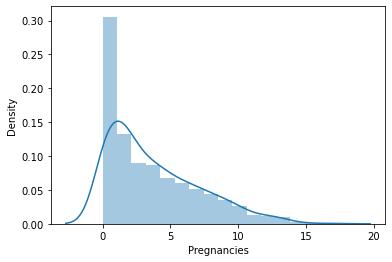

In [13]:
sns.distplot(df['Pregnancies'])

In [14]:
df.Glucose.value_counts()

100    16
99     16
106    14
111    14
112    13
       ..
182     1
169     1
178     1
177     1
199     1
Name: Glucose, Length: 135, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Glucose', ylabel='Density'>

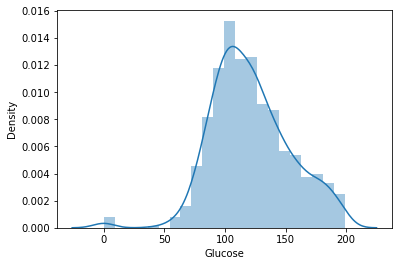

In [15]:
sns.distplot(df['Glucose'])

In [16]:
df.BloodPressure.value_counts()

70     53
74     47
78     44
64     42
68     42
72     41
76     37
80     35
60     33
62     33
82     29
0      29
66     27
88     23
86     20
84     20
58     19
90     19
56     12
54     11
52     10
50      9
75      7
65      6
92      5
94      5
85      5
48      5
44      4
106     3
98      3
100     3
55      2
46      2
96      2
108     2
104     2
110     2
102     1
114     1
61      1
95      1
40      1
38      1
30      1
24      1
122     1
Name: BloodPressure, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

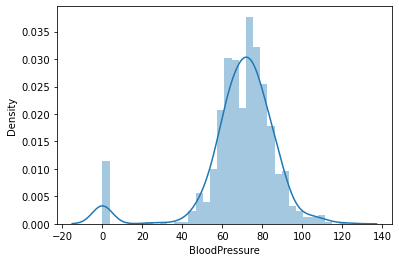

In [17]:
sns.distplot(df['BloodPressure'])

In [18]:
df.SkinThickness.value_counts()

0     202
32     30
30     25
27     22
18     20
23     19
28     19
31     19
39     18
33     17
25     16
37     16
22     15
19     15
40     15
29     15
17     14
41     14
36     13
35     13
26     13
15     12
20     11
24     10
13     10
42     10
21      9
34      8
46      8
12      7
16      6
43      6
14      6
38      5
44      5
45      5
11      5
10      4
49      4
48      4
47      3
50      2
8       2
52      2
7       2
60      1
56      1
63      1
51      1
54      1
99      1
Name: SkinThickness, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

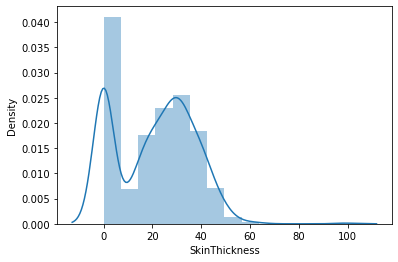

In [19]:
sns.distplot(df['SkinThickness'])

In [20]:
df.Insulin.value_counts()

0      340
105     11
140      9
130      8
120      8
      ... 
321      1
318      1
310      1
142      1
744      1
Name: Insulin, Length: 175, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

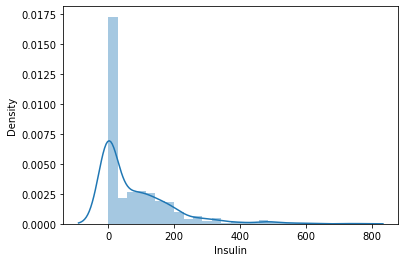

In [21]:
sns.distplot(df['Insulin'])

In [22]:
df.DiabetesPedigreeFunction.value_counts()

0.258    6
0.207    5
0.261    5
0.238    5
0.259    5
        ..
0.580    1
1.076    1
0.720    1
0.661    1
0.645    1
Name: DiabetesPedigreeFunction, Length: 486, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

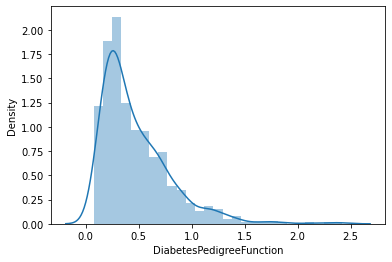

In [23]:
sns.distplot(df['DiabetesPedigreeFunction'])

In [24]:
df.Age.value_counts()

22    68
21    59
25    44
24    43
28    34
23    33
26    30
27    28
29    26
31    21
41    19
37    18
30    18
33    16
36    16
42    16
45    15
38    14
40    14
32    13
46    13
43    12
34    11
39    10
35     9
44     9
52     8
58     7
47     7
50     7
51     6
48     5
49     5
54     4
53     4
66     4
60     4
55     4
63     4
56     3
67     3
62     3
65     2
69     2
61     2
59     2
57     2
64     1
72     1
68     1
70     1
81     1
Name: Age, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

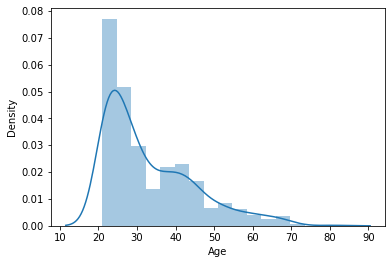

In [25]:
sns.distplot(df['Age'])

### Find correlation between variables

In [26]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.116932       0.157599      -0.061853   
Glucose                      0.116932  1.000000       0.138344       0.055964   
BloodPressure                0.157599  0.138344       1.000000       0.207965   
SkinThickness               -0.061853  0.055964       0.207965       1.000000   
Insulin                     -0.056797  0.314234       0.080074       0.440908   
BMI                          0.035649  0.239677       0.259010       0.367128   
DiabetesPedigreeFunction    -0.022508  0.153398       0.047815       0.190130   
Age                          0.555254  0.241344       0.239591      -0.105379   
Outcome                      0.225252  0.454605       0.062021       0.081119   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.056797  0.035649                 -0.022508   
Glucose                   0.314234  0.239677                  0.153398   
BloodPressure             0.080074  0.259010                  0.047815   
SkinThickness             0.440908  0.367128                  0.190130   
Insulin                   1.000000  0.192445                  0.211323   
BMI                       0.192445  1.000000                  0.132621   
DiabetesPedigreeFunction  0.211323  0.132621                  1.000000   
Age                      -0.064545  0.047027                  0.032002   
Outcome                   0.119657  0.285811                  0.179637   

                               Age   Outcome  
Pregnancies               0.555254  0.225252  
Glucose                   0.241344  0.454605  
BloodPressure             0.239591  0.062021  
SkinThickness            -0.105379  0.081119  
Insulin                  -0.064545  0.119657  
BMI                       0.047027  0.285811  
DiabetesPedigreeFunction  0.032002  0.179637  
Age                       1.000000  0.227036  
Outcome                   0.227036  1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

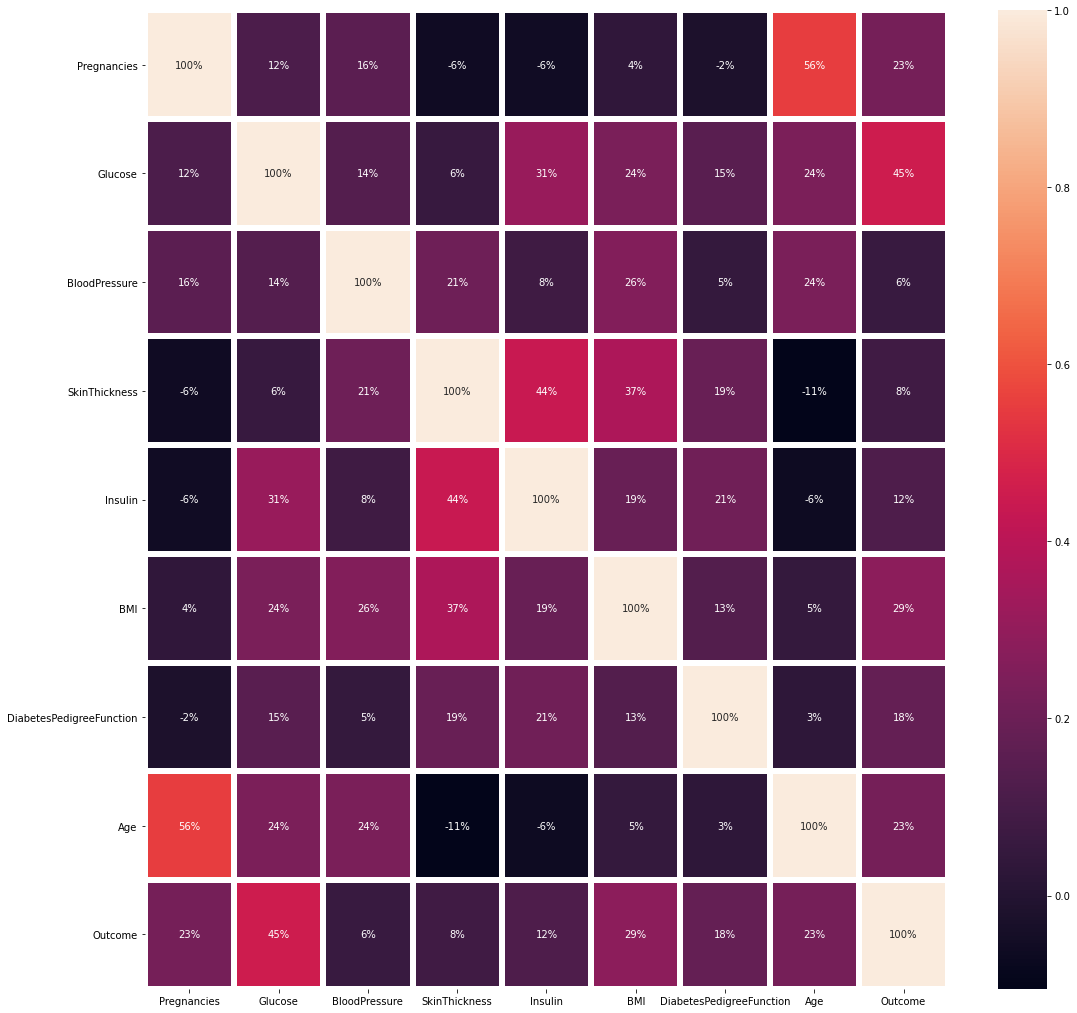

In [27]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,linewidths=5,fmt='.0%',ax=ax)
plt.show

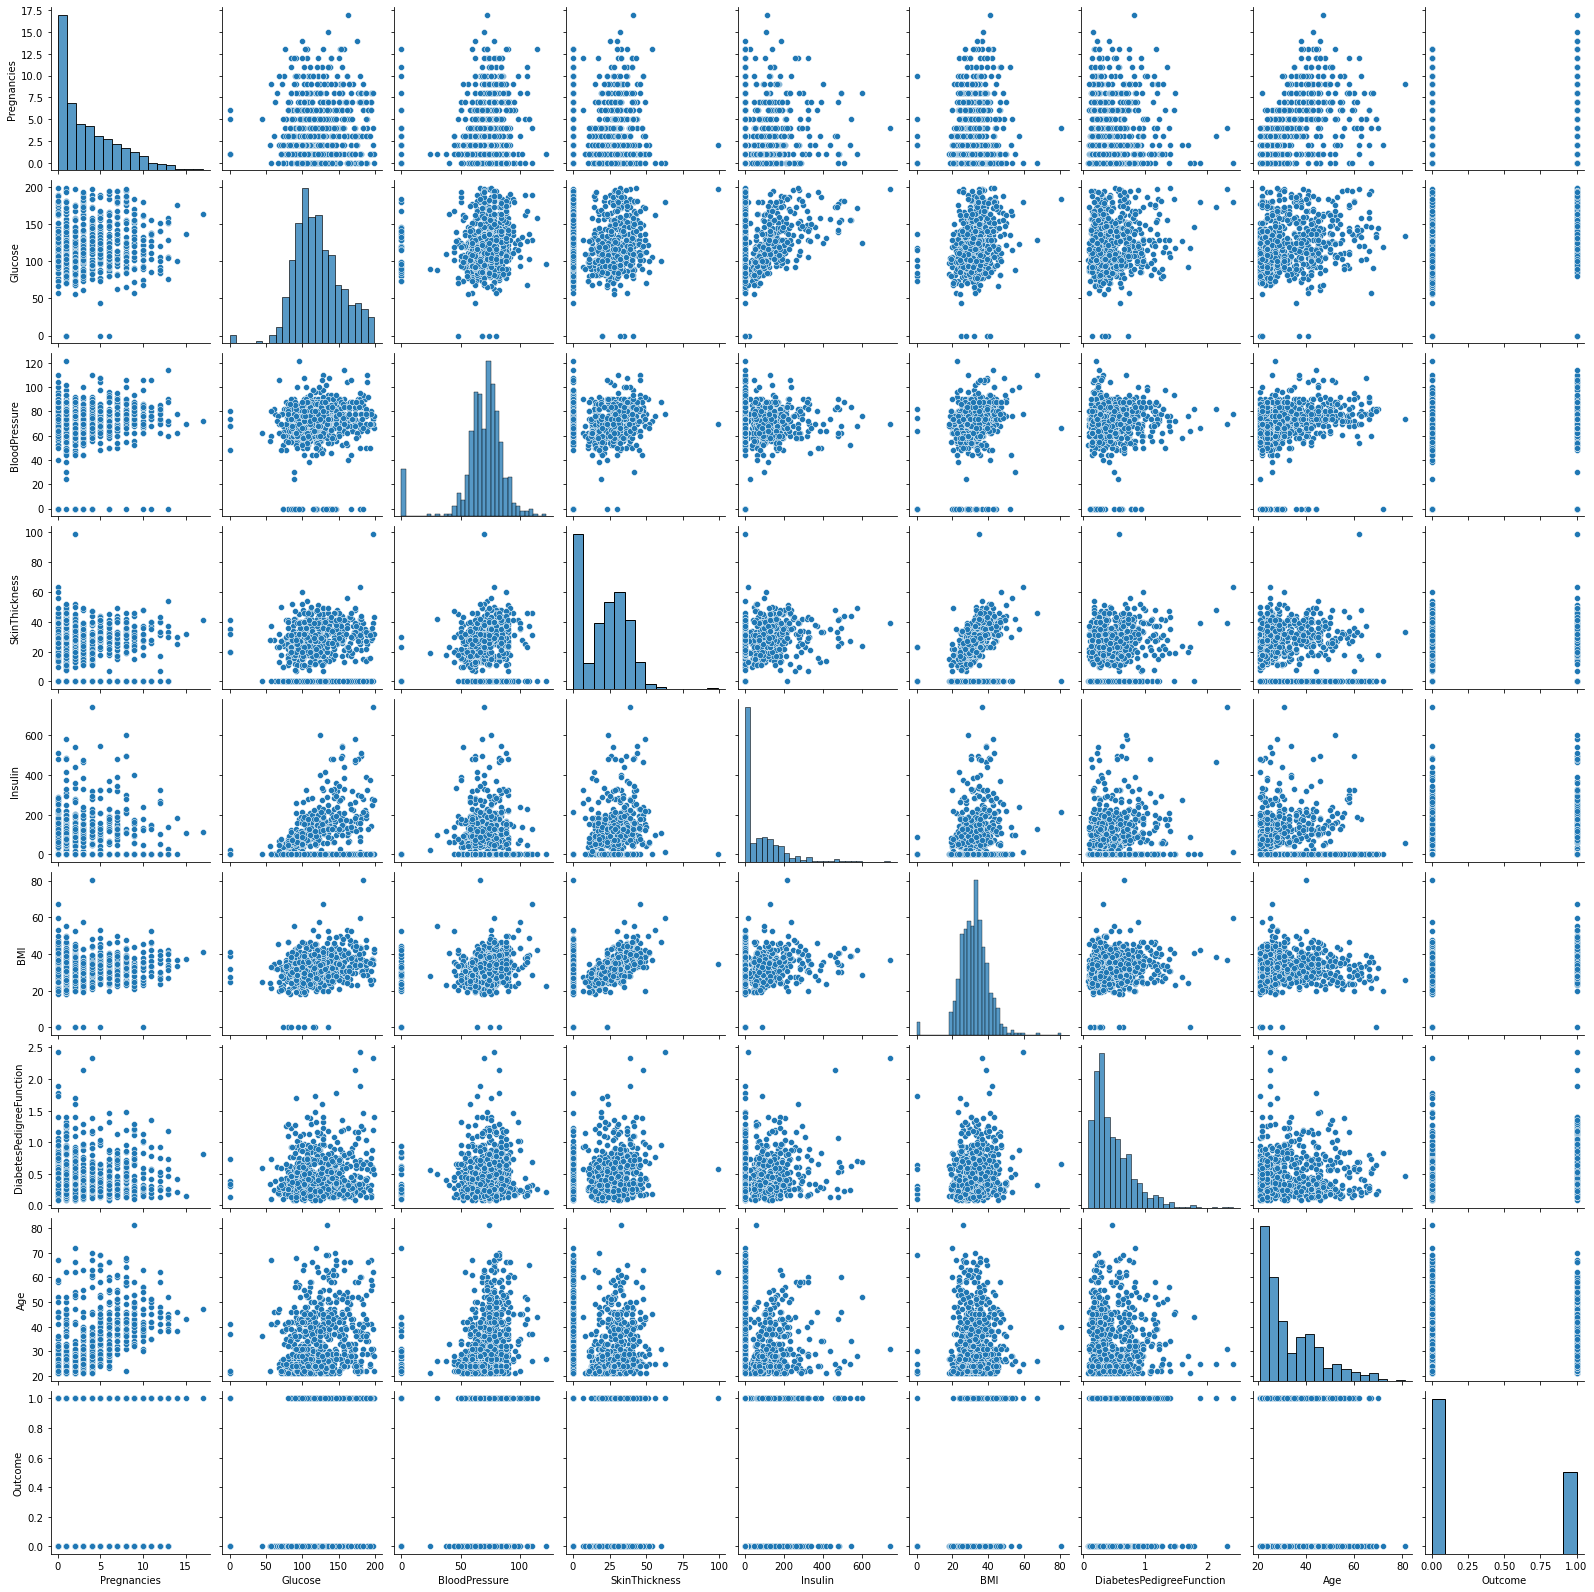

In [28]:
sns.pairplot(df)

In [29]:
"""!pip install statsmodel
import statsmodel as sm
print(f'Skewness of SalePrice : {round(stats.skew(df.SalePrice),2)}')

fig = plt.figure(figsize=(7,4))
ax = sns.distplot(df_train.Outcome, fit=sm.norm)
ax.set_title('Distribution of Outcome', size=18, y=1.05)
plt.show();"""

"!pip install statsmodel\nimport statsmodel as sm\nprint(f'Skewness of SalePrice : {round(stats.skew(df.SalePrice),2)}')\n\nfig = plt.figure(figsize=(7,4))\nax = sns.distplot(df_train.Outcome, fit=sm.norm)\nax.set_title('Distribution of Outcome', size=18, y=1.05)\nplt.show();"

In [30]:
# feature engineering
# seperate & assign 
# features to X  & output or response to y variable
feature_col=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X=df[feature_col]
y=df.Outcome

In [31]:
# model building

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [33]:
logreg = LogisticRegression()

In [34]:
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_pred=logreg.predict(X_test)

In [36]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)